In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### helper methods

In [3]:
def eclud_dist(x1, y1, x2, y2):
    return round(np.sqrt(np.square(x1-x2) + np.square(y1-y2)), 2)

In [4]:
def abs_dist(x1, y1, x2, y2):
    return np.abs((x1-x2) + (y1-y2))

In [5]:
def dot_product(x1, y1, x2, y2):
    return x1*x2 + y1*y2

In [6]:
def magnitude(x , y):
    return np.sqrt(x**2 + y**2)

In [7]:
def sim_magnitude(v1, v2):
    return abs(magnitude(*v1) - magnitude(*v2))

In [8]:
def sim_dot_prd(v1, v2):
    return round(dot_product(*v1, *v2) / (magnitude(*v1) * magnitude(*v2)), 5)

In [9]:
def plot_centers(C):
    for c in C.keys():
        plt.scatter(*C[c], color=color_map[c])

In [10]:
def plot_k_means(df, C, title = 'K-means'):
    plt.scatter(df.x, df.y, color=df.color, alpha=0.3)
    plot_centers(C)
    plt.title(title)
    plt.show()


### Generate data

In [11]:
df = pd.DataFrame(np.random.randint(4,100,(100,2)), columns=['x', 'y'])

In [12]:
df_copy = df

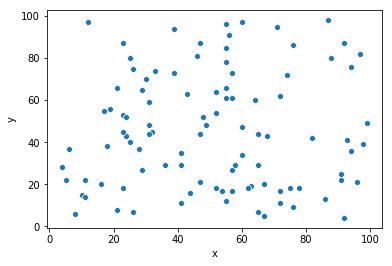

In [13]:
sns.scatterplot(df.x, df.y)

### Constants

In [14]:
color_map2 = {1: 'red', 2: 'green', 3: 'black'}
color_map = {'C_1':'red', 'C_2':'green', 'C_3':'black'}

### Selecting random centers

In [15]:
## Number of clusters
k = 3

In [16]:
C = {
    f"C_{i+1}": [np.random.choice(df.x), np.random.choice(df.y)]
    for i in range(k)
}

C

{'C_1': [21, 34], 'C_2': [25, 87], 'C_3': [49, 20]}

In [17]:
df.head()

,x,y
0,55,96
1,60,47
2,4,28
3,91,22
4,57,17


### Plot Random Centers

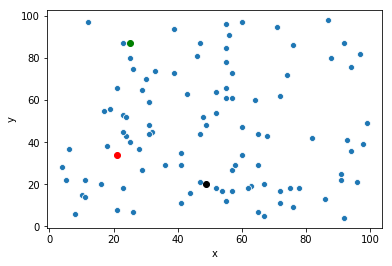

In [18]:
sns.scatterplot(df.x, df.y)
plot_centers(C)


### Calculating distance
**Ecludian distance** between each point and the center

In [19]:
df['cluster'] = 0.0

In [20]:
for c in C.keys():
    df[f'{c}_dist'] = df.apply(lambda d: eclud_dist(d.x,d.y, C[c][0], C[c][1]), axis= 1)

In [21]:
df.head()

,x,y,cluster,C_1_dist,C_2_dist,C_3_dist
0,55,96,0.0,70.71,31.32,76.24
1,60,47,0.0,41.11,53.15,29.15
2,4,28,0.0,18.03,62.63,45.71
3,91,22,0.0,71.02,92.63,42.05
4,57,17,0.0,39.81,76.97,8.54


In [22]:
for i, c in enumerate(C.keys()):
    c_index = df[df[f'{c}_dist'] == df.iloc[:, -3:].apply(min, axis= 1)][f'{c}_dist'].index
    df.loc[c_index, 'cluster'] = i+1

In [23]:
df.head()

,x,y,cluster,C_1_dist,C_2_dist,C_3_dist
0,55,96,2.0,70.71,31.32,76.24
1,60,47,3.0,41.11,53.15,29.15
2,4,28,1.0,18.03,62.63,45.71
3,91,22,3.0,71.02,92.63,42.05
4,57,17,3.0,39.81,76.97,8.54


In [24]:
df.cluster.value_counts(normalize=True)

3.0    0.44
2.0    0.31
1.0    0.25
Name: cluster, dtype: float64

In [25]:
df['color'] = df.cluster.apply(int).map(color_map2)

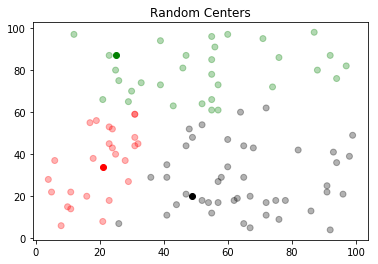

In [26]:
plot_k_means(df, C, 'Random Centers')

### Updating Centers

    - Calculate mean for each cluster
    - update center


In [27]:
C_old = C.copy()

In [28]:
for i, c in enumerate(C.keys()):
    C[c] = list(df[df.cluster == i+1][['x', 'y']].mean().apply(int).values)

In [29]:
C_old

{'C_1': [21, 34], 'C_2': [25, 87], 'C_3': [49, 20]}

In [30]:
C

{'C_1': [20, 35], 'C_2': [53, 79], 'C_3': [65, 27]}

### Centers position being updated

##### C_old

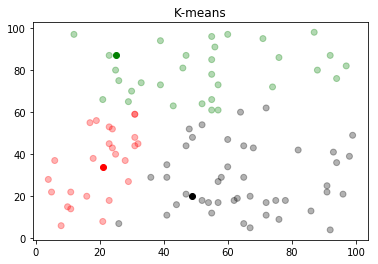

In [31]:
plot_k_means(df, C_old)

##### updated C 

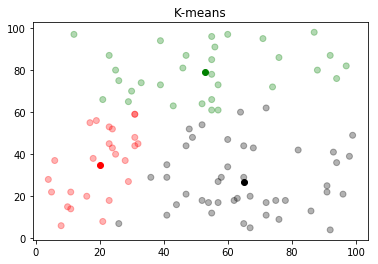

In [32]:
plot_k_means(df, C)


<hr style="border: 5px solid tomato">

### Functional way

In [33]:
def generate_centers(df, k =3):
    Centers = {f"C_{i+1}": [np.random.choice(df.x), np.random.choice(df.y)]
         for i in range(k)}
    return Centers
    

In [34]:
def calc_dists(df, Centers):
    cols = [col for col in df.columns if 'dist' in col]
    for c in Centers.keys():
        df[f'{c}_dist'] = df.apply(lambda d: eclud_dist(d.x,d.y, Centers[c][0], Centers[c][1]), axis= 1)
    
    for i, c in enumerate(Centers.keys()):
        c_index = df[df[f'{c}_dist'] == df[cols].apply(min, axis= 1)][f'{c}_dist'].index
        df.loc[c_index, 'cluster'] = i+1
    
    df['color'] = df.cluster.apply(int).map(color_map2)
    
    return df

In [35]:
def update_centers(Centers):
    C_old = Centers.copy()
    for i, c in enumerate(Centers.keys()):
        Centers[c] = list(df[df.cluster == i+1][['x', 'y']].mean().apply(int).values)
    return Centers, C_old

In [36]:
def centers_diff(C_new, C_old):
    centers = np.array([])
    for i, j in zip(list(C.values()),list(C_old.values())):
        centers = np.append(sim_magnitude(i, j), centers)
        
    return round(centers.mean(), 2)

iteration 1: diff = 9.64


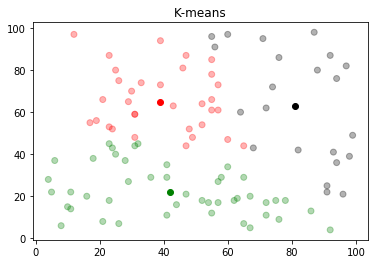

iteration 2: diff = 1.07


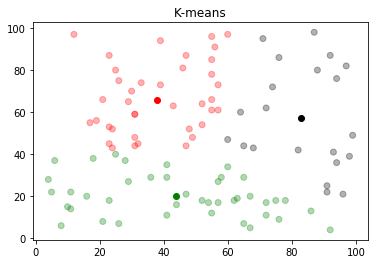

iteration 3: diff = 0.0


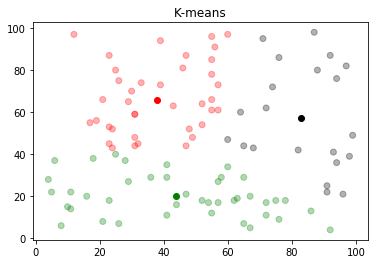

In [37]:
i = 0
diff = 1

C = generate_centers(df)

while diff > 0:
    
    df = calc_dists(df, C)

    C, C_old = update_centers(C)
    
    diff = centers_diff(C, C_old)
    print(f"iteration {i+1}: diff = {diff}")
    
    i += 1
    
    plot_k_means(df, C)
